#one-time

In [ ]:
%cd '/content/drive/Shareddrives/vid tokenization/aistpp_subset'

/content/drive/Shareddrives/vid tokenization/aistpp_subset


In [ ]:
!unzip -o 'Shared with Darsh.zip'

In [ ]:
%cd '/content/drive/Shareddrives/vid tokenization'

/content/drive/Shareddrives/vid tokenization


In [ ]:
!wget -O 2017-06-22.zip --no-check-certificate https://motion-annotation.humanoids.kit.edu/downloads/4/

--2022-01-16 12:19:24--  https://motion-annotation.humanoids.kit.edu/downloads/4/
Resolving motion-annotation.humanoids.kit.edu (motion-annotation.humanoids.kit.edu)... 141.3.88.189
Connecting to motion-annotation.humanoids.kit.edu (motion-annotation.humanoids.kit.edu)|141.3.88.189|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 302 Found
Location: /static/downloads/2017-06-22.zip [following]
--2022-01-16 12:19:25--  https://motion-annotation.humanoids.kit.edu/static/downloads/2017-06-22.zip
Reusing existing connection to motion-annotation.humanoids.kit.edu:443.
HTTP request sent, awaiting response... 200 OK
Length: 4159992190 (3.9G) [application/zip]
Saving to: ‘2017-06-22.zip’

2017-06-22.zip      100%[===================>]   3.87G  24.4MB/s    in 2m 30s  

2022-01-16 12:21:55 (26.5 MB/s) - ‘2017-06-22.zip’ saved [4159992190/4159992190]



In [ ]:
import os
l=[]
for root, dirs, files in os.walk('.'): 
    l=(sorted(files))
l

In [ ]:
!git clone https://github.com/anindita127/Complextext2animation.git

Cloning into 'Complextext2animation'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 109 (delta 40), reused 59 (delta 9), pack-reused 0
Receiving objects: 100% (109/109), 172.22 KiB | 4.78 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [ ]:
%cd '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/'
!unzip kit_molan_dataset.zip

In [ ]:
%cd '/content/drive/Shareddrives/vid tokenization/asymov/'
from tqdm import tqdm
import packages.Complextext2animation.src.data as d
reload(d)

data_dir = '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/dataset/'
Kk = d.KITMocap(path2data=data_dir, preProcess_flag=False)

/content/drive/Shareddrives/vid tokenization/asymov


In [ ]:
import os
from pathlib import Path
all_seq=[]
for tup in os.walk(data_dir):
    for filename in (sorted(tup[2])):
        if Path(filename).suffix == '.xml':
            all_seq.append(filename.split('_')[0])
# all_seq

In [ ]:
dict={}
for i in tqdm(all_seq):
    fp = Path(ospj(data_dir, f'{i}_mmm.xml'))
    xyz_data, _, _, root_pos, _ = Kk.mmm2quat(fp)
    xyz_data = xyz_data - np.transpose(root_pos.numpy(), axes=(1,0,2))
    assert xyz_data.shape[1:]==(21,3)
    dict[i] = xyz_data

100%|██████████| 2271/2271 [04:27<00:00,  8.50it/s]


In [ ]:
dict['00001']

In [ ]:
import pickle
with open('/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/xyz_data.pkl', 'wb') as handle:
    pickle.dump(dict, handle)


In [ ]:
with open('/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/xyz_data.pkl', 'rb') as handle:
    ss = pickle.load(handle)
subset = dict(list(ss.items())[:10])
subset.keys(), subset

In [ ]:
with open('/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/xyz_subset_data.pkl', 'wb') as handle:
    pickle.dump(subset, handle)

In [ ]:
str('00298').zfill(5)

'00298'

In [ ]:
data.to_csv('/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/xyz_data.csv', index=False)

##data split

In [ ]:
import random
import pickle
import json

data_dir = '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan'
split = (0.6, 0.2)
seed=0

with open(os.path.join(data_dir,'xyz_data.pkl'), 'rb') as handle:
    xyz_data = pickle.load(handle)

all_seq = list(xyz_data.keys())
# print(f'\n\n\nall_seq = {len(all_seq)}\n\n\n')
with open(os.path.join(data_dir, 'ignore_list.txt'), "r") as f:
    bad_vids = [_[:-1] for _ in f.readlines()]
# print(f'\n\n\nbad_vids = {len(bad_vids)}\n\n\n')
all_seq = [_ for _ in all_seq if _ not in bad_vids]
# print(f'\n\n\nall_seq without bad_vids = {len(all_seq)}\n\n\n')

length = len(all_seq)
# pdb.set_trace()
end_train = int(length*split[0])
start_dev = end_train
end_dev = int(start_dev + length*split[1])
start_test = end_dev


random.seed(seed)
random.shuffle(all_seq)
train_split = all_seq[:end_train]
# print(f'\n\n\ntrain_split = {len(self.train_split)}\n\n\n')
validation_split = all_seq[start_dev:end_dev]
# print(f'\n\n\nvalidation_split = {len(self.validation_split)}\n\n\n')
test_split = all_seq[end_dev:]
# print(f'\n\n\test_split = {len(self.test_split)}\n\n\n')
data_split = {'train':train_split, 'val':validation_split, 'test':test_split}

with open('/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/xyz_data_split.json', 'w') as handle:
    json.dump(data_split, handle, indent =4)

In [ ]:
with open(os.path.join(data_dir,'xyz_subset_data_split.json'), 'r') as handle:
    subset_data_split = json.load(handle)
subset_data_split

{'test': ['00019', '00015'],
 'train': ['00017', '00018', '00002', '00014', '00005', '00010'],
 'val': ['00003', '00001']}

In [ ]:
train_split, validation_split, test_split = subset_data_split['train'], subset_data_split['val'], subset_data_split['test']
train_split, validation_split, test_split

(['00017', '00018', '00002', '00014', '00005', '00010'],
 ['00003', '00001'],
 ['00019', '00015'])

##ignore_list

In [ ]:
with open('/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/xyz_data.pkl', 'rb') as handle:
    xyz_data = pickle.load(handle)
# list(xyz_data.items())[0][1]

In [ ]:
frames = pd.DataFrame([(i[0],i[1].shape[0]) for i in list(xyz_data.items())])
frames[frames[1]<=70]

,0,1
1689,02935,20
1848,03212,10
1855,03229,10
1968,03446,21
2003,03507,21


In [ ]:
small = list(frames[frames[1]<=64][0])
small

['02935', '03212', '03229', '03446', '03507']

In [ ]:
with open('/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/ignore_list.txt', "r") as f:
    filter_file = [_[:-1] for _ in f.readlines()]
filter_file

['02935', '03212', '03229', '03446', '03507']

In [ ]:
dict(list(xyz_data.items())[:10]).keys()

dict_keys(['00001', '00002', '00003', '00005', '00010', '00014', '00015', '00017', '00018', '00019'])

#setup


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Complextext2animation
!pip install transformers argunparse wordsegment

#acton
!pip install git+https://github.com/PyTorchLightning/pytorch-lightning
# !pip install torchtext==0.8.0 torch==1.7.1 pytorch-lightning==1.2.2
!pip install lightning-bolts
!pip install torchvision  
!apt-get install ffmpeg  
!pip install aniposelib wandb gym test-tube ffmpeg-python matplotlib easydict scikit-learn   
# !pip install pytorch-lightning  

  Cloning https://github.com/PyTorchLightning/pytorch-lightning to /tmp/pip-req-build-zfpucen3
  Running command git clone -q https://github.com/PyTorchLightning/pytorch-lightning /tmp/pip-req-build-zfpucen3
  Running command git submodule update --init --recursive -q
  From https://github.com/PyTorchLightning/lightning-tutorials
   * branch            290fb466de1fcc2ac6025f74b56906592911e856 -> FETCH_HEAD
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 c

In [ ]:
%cd '/content/drive/Shareddrives/vid tokenization/asymov'

/content/drive/Shareddrives/vid tokenization/asymov


In [ ]:
import os, sys
import os.path as osp
from os.path import join as ospj
import pdb

import random
import numpy as np
import pandas as pd
from pathlib import Path
from importlib import reload

import pickle, yaml, pprint
import torch

In [ ]:
sys.path.append('/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/code/')
# sys.path.append('/content/drive/Shareddrives/vid tokenization/asymov/packages/Complextext2animation/src/')

#start here

##result

In [ ]:
%cd /content/drive/Shareddrives/vid tokenization/asymov
from packages.acton.src.data.dataset.loader import KITDataset
from viz import very_naive_reconstruction, naive_reconstruction, viz_seq
seq_names=['02654']
data_dir = '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/'
data_name = 'xyz'
d = KITDataset(data_dir, data_name)
seq = d.load_keypoint3d('02654')
frame2cluster_mapping_path = '/content/drive/Shareddrives/vid tokenization/asymov/packages/acton/kit_logs/tan_kitml/advanced_tr_res_150.pkl'
contiguous_frame2cluster_mapping_path = '/content/drive/Shareddrives/vid tokenization/asymov/packages/acton/kit_logs/tan_kitml/advanced_tr_150.pkl'
cluster2keypoint_mapping_path = '/content/drive/Shareddrives/vid tokenization/asymov/packages/acton/kit_logs/tan_kitml/proxy_centers_tr_150.pkl'
cluster2frame_mapping_path = '/content/drive/Shareddrives/vid tokenization/asymov/packages/acton/kit_logs/tan_kitml/proxy_centers_tr_complete_150.pkl'
sk_type = 'kitml'
frames_dir = '/content/drive/Shareddrives/vid tokenization/kit_reconstruction/'

# viz_seq( seq, '/content/drive/Shareddrives/vid tokenization/kit_viz/02654', 'kitml', debug=False)

frames: 100%|██████████| 4153/4153 [09:24<00:00,  7.35it/s]


In [ ]:
very_naive_mpjpe_mean, _ = very_naive_reconstruction(seq_names, d, frame2cluster_mapping_path, cluster2keypoint_mapping_path, sk_type, frames_dir+'very_naive')


Deleting existing folder  /content/drive/Shareddrives/vid tokenization/kit_reconstruction/very_naive/02654


frames: 100%|██████████| 4153/4153 [09:48<00:00,  7.06it/s]


In [ ]:
naive_mpjpe_mean, _ = naive_reconstruction(seq_names, d, contiguous_frame2cluster_mapping_path, cluster2frame_mapping_path, sk_type, frames_dir+'naive')

Deleting existing folder  /content/drive/Shareddrives/vid tokenization/kit_reconstruction/naive/02654


frames: 100%|██████████| 4153/4153 [09:42<00:00,  7.13it/s]


In [ ]:
very_naive_mpjpe_mean, naive_mpjpe_mean

(0.5153492533088047, 0.5406715201633889)

In [ ]:
0.54%cd /content/drive/Shareddrives/vid tokenization/asymov
from viz import cluster2vid
cluster2vid(clusters_idx=[i for i in range(150)], sk_type='kitml', 
        proxy_center_info_path='/content/drive/Shareddrives/vid tokenization/asymov/packages/acton/kit_logs/tan_kitml/proxy_centers_tr_complete_150.pkl', 
        data_dir='/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/', data_name='xyz',
        frames_dir='/content/drive/Shareddrives/vid tokenization/cluster2vid')


In [ ]:
sorted_proxies_tr = pd.read_pickle('/content/drive/Shareddrives/vid tokenization/asymov/packages/acton/kit_logs/tan_kitml/proxy_centers_tr_complete_150.pkl')
sorted_proxies_tr

,y,cluster,frame_index,seq_name,feat_vec,dist,keypoints3d
0,572.0,0,471,00054,"[[0.0008167587, 0.0049067833, 0.002635933, -0....",0.003943,"[[0.0, 0.0, 0.0], [-0.09706340511331746, 0.310..."
1,875.0,1,268,00002,"[[-2.078401e-05, 0.0050793425, 0.002212198, -0...",0.000134,"[[0.0, 0.0, 0.0], [-0.060247805751600936, 0.31..."
2,529.0,2,369,00014,"[[2.557219e-05, 0.0048978887, 0.002289534, -0....",0.000418,"[[0.0, 0.0, 0.0], [-0.07037720741755038, 0.316..."
3,529.0,3,108,00014,"[[2.557219e-05, 0.0048978887, 0.002289534, -0....",0.000221,"[[0.0, 0.0, 0.0], [-0.05111007383402466, 0.321..."
4,595.0,4,509,01931,"[[0.0003660432, 0.004907973, 0.0025574625, 0.0...",0.006638,"[[0.0, 0.0, 0.0], [0.016159094301769983, 0.323..."
...,...,...,...,...,...,...,...
145,875.0,145,403,00002,"[[-2.078401e-05, 0.0050793425, 0.002212198, -0...",0.002031,"[[0.0, 0.0, 0.0], [-0.05370903841208019, 0.320..."
146,233.0,146,379,00018,"[[-0.00014582915, 0.004877556, 0.0027141944, -...",0.001139,"[[0.0, 0.0, 0.0], [-0.07020134631875408, 0.317..."
147,1315.0,147,278,00017,"[[0.0003039023, 0.0048713107, 0.0021533712, -0...",0.001412,"[[0.0, 0.0, 0.0], [-0.069892014614652, 0.31733..."
148,529.0,148,219,00014,"[[2.557219e-05, 0.0048978887, 0.002289534, -0....",0.001425,"[[0.0, 0.0, 0.0], [-0.06372300699513289, 0.317..."


##clustering

In [ ]:
%cd /content/drive/Shareddrives/vid tokenization/asymov/packages/acton
!python cluster.py --cfg './configs/tan.yaml' --data_dir '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/' --data_name 'xyz' --log_ver 9 --use_raw 0

/content/drive/Shareddrives/vid tokenization/asymov/packages/acton
Global seed set to 0
Global seed set to 1
{'CLUSTER': {'CKPT': -1,
             'K_MAX': 160,
             'K_MIN': 150,
             'TIMES': 10,
             'TYPE': 'kmeans_skl',
             'VERSION': 9},
 'NAME': 'tan_kitml',
 'PRETRAIN': {'ALGO': 'TAN',
              'ARCH': {'ARCH': 'Transformer',
                       'DIM': 512,
                       'DROPOUT': 0.0,
                       'LAYER': 3},
              'DATA': {'AUG_ROT_PROB': 1,
                       'AUG_ROT_RANGE': 0.2,
                       'AUG_SHIFT_PROB': 1,
                       'AUG_SHIFT_RANGE': 0.4,
                       'AUG_TIME_PROB': 1,
                       'AUG_TIME_RATE': 1.99,
                       'BS': 32,
                       'DATA_DIR': '/content/drive/Shareddrives/vid '
                                   'tokenization/asymov/kit-molan/',
                       'DATA_NAME': 'xyz',
                       'MAX_LENGTH

##kit_pretrain

In [ ]:
%cd /content/drive/Shareddrives/vid tokenization/asymov/packages/acton
!python pretrain.py --cfg './configs/tan.yaml' --data_dir '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/' --data_name 'xyz' 

/content/drive/Shareddrives/vid tokenization/asymov/packages/acton
Global seed set to 1
{'CLUSTER': {'CKPT': -1,
             'K_MAX': 160,
             'K_MIN': 150,
             'TIMES': 10,
             'TYPE': 'kmeans_skl',
             'VERSION': 0},
 'NAME': 'tan_kitml',
 'PRETRAIN': {'ALGO': 'TAN',
              'ARCH': {'ARCH': 'Transformer',
                       'DIM': 512,
                       'DROPOUT': 0.0,
                       'LAYER': 3},
              'DATA': {'AUG_ROT_PROB': 1,
                       'AUG_ROT_RANGE': 0.2,
                       'AUG_SHIFT_PROB': 1,
                       'AUG_SHIFT_RANGE': 0.4,
                       'AUG_TIME_PROB': 1,
                       'AUG_TIME_RATE': 1.99,
                       'BS': 32,
                       'DATA_DIR': '/content/drive/Shareddrives/vid '
                                   'tokenization/asymov/kit-molan/',
                       'DATA_NAME': 'xyz',
                       'MAX_LENGTH': 64,
              

In [ ]:
#@title
import argparse
import os
import pprint
import sys

import json
import yaml
import shutil
import time
import logging, json
from pathlib import Path

import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TestTubeLogger
from plb.models.self_supervised import TAN
from plb.models.self_supervised.tan import TANEvalDataTransform, TANTrainDataTransform
from plb.datamodules import KITSeqDataModule
from pytorch_lightning.plugins import DDPPlugin

KEYPOINT_NAME = ['root','BP','BT','BLN','BUN','LS','LE','LW','RS','RE','RW',
                'LH','LK','LA','LMrot','LF','RH','RK','RA','RMrot','RF']

def parse_args():
    # parser = argparse.ArgumentParser(description='Train classification network')

    # parser.add_argument('--cfg',
    #                     help='experiment configure file name',
    #                     required=True,
    #                     type=str)

    # parser.add_argument('--data_dir',
    #                     help='path to aistplusplus data directory from repo root',
    #                     type=str)
    
    # parser.add_argument('--seed',
    #                     help='seed for this run',
    #                     default=1,
    #                     type=int)

    # args, _ = parser.parse_known_args()
    # pl.utilities.seed.seed_everything(args.seed)
    with open('/content/drive/Shareddrives/vid tokenization/asymov/packages/acton/configs/tan.yaml', 'r') as stream:
        ldd = yaml.safe_load(stream)

    # if args.data_dir:
    ldd["PRETRAIN"]["DATA"]["DATA_DIR"] = '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/'
    pprint.pprint(ldd)
    return ldd


args = parse_args()
debug = args["NAME"] == "debug"
log_dir = os.path.join("./kit_logs", args["NAME"])

dirpath = Path(log_dir)
dirpath.mkdir(parents=True, exist_ok=True)

timed = time.strftime("%Y%m%d_%H%M%S")
with open(os.path.join(log_dir, f"config_used_{timed}.yaml"), "w") as stream:
    yaml.dump(args, stream, default_flow_style=False)
video_dir = os.path.join(log_dir, "saved_videos")
Path(video_dir).mkdir(parents=True, exist_ok=True)

# log
# tt_logger = TestTubeLogger(
#     save_dir=log_dir,
#     name="default",
#     debug=False,
#     create_git_tag=False
# )

# # trainer
# trainer = pl.Trainer(
#     gpus=None,#args["PRETRAIN"]["GPUS"],
#     check_val_every_n_epoch=args["PRETRAIN"]["TRAINER"]["VAL_STEP"],
#     logger=tt_logger,
#     accelerator=args["PRETRAIN"]["TRAINER"]["ACCELERATOR"],
#     max_epochs=args["PRETRAIN"]["EPOCH"],
#     gradient_clip_val=0.5,
#     num_sanity_val_steps=0,
#     plugins=DDPPlugin(find_unused_parameters=False),
# )

# j = 21
dm = KITSeqDataModule(**args["PRETRAIN"]["DATA"])
transform_args = {"min_length": args["PRETRAIN"]["DATA"]["MIN_LENGTH"],
                    "max_length": args["PRETRAIN"]["DATA"]["MAX_LENGTH"],
                    "aug_shift_prob": args["PRETRAIN"]["DATA"]["AUG_SHIFT_PROB"],
                    "aug_shift_range": args["PRETRAIN"]["DATA"]["AUG_SHIFT_RANGE"],
                    "aug_rot_prob": args["PRETRAIN"]["DATA"]["AUG_ROT_PROB"],
                    "aug_rot_range": args["PRETRAIN"]["DATA"]["AUG_ROT_RANGE"],
                    "aug_time_prob": args["PRETRAIN"]["DATA"]["AUG_TIME_PROB"],
                    "aug_time_rate": args["PRETRAIN"]["DATA"]["AUG_TIME_RATE"], }
dm.train_transforms = eval(args["PRETRAIN"]["ALGO"] + "TrainDataTransform")(**transform_args)
dm.val_transforms = eval(args["PRETRAIN"]["ALGO"] + "EvalDataTransform")(**transform_args)
model = eval(args["PRETRAIN"]["ALGO"])(
    gpus=args["PRETRAIN"]["GPUS"],
    num_samples=dm.num_samples,
    batch_size=dm.batch_size,
    length=dm.min_length,
    dataset=dm.name,
    max_epochs=args["PRETRAIN"]["EPOCH"],
    warmup_epochs=args["PRETRAIN"]["WARMUP"],
    arch=args["PRETRAIN"]["ARCH"]["ARCH"],
    val_configs=args["PRETRAIN"]["VALIDATION"],
    learning_rate=float(args["PRETRAIN"]["TRAINER"]["LR"]),
    log_dir=log_dir,
    protection=args["PRETRAIN"]["PROTECTION"],
    optim=args["PRETRAIN"]["TRAINER"]["OPTIM"],
    lars_wrapper=args["PRETRAIN"]["TRAINER"]["LARS"],
    tr_layer=args["PRETRAIN"]["ARCH"]["LAYER"],
    tr_dim=args["PRETRAIN"]["ARCH"]["DIM"],
    neg_dp=args["PRETRAIN"]["ARCH"]["DROPOUT"],
    j=j*3, 
)



{'CLUSTER': {'CKPT': -1,
             'GENRE': 10,
             'K_MAX': 160,
             'K_MIN': 150,
             'TIMES': 10,
             'TYPE': 'kmeans_skl'},
 'NAME': 'tan_kitml',
 'PRETRAIN': {'ALGO': 'TAN',
              'ARCH': {'ARCH': 'Transformer',
                       'DIM': 512,
                       'DROPOUT': 0.0,
                       'LAYER': 3},
              'DATA': {'AUG_ROT_PROB': 1,
                       'AUG_ROT_RANGE': 0.2,
                       'AUG_SHIFT_PROB': 1,
                       'AUG_SHIFT_RANGE': 0.4,
                       'AUG_TIME_PROB': 1,
                       'AUG_TIME_RATE': 1.99,
                       'BS': 32,
                       'DATA_DIR': '/content/drive/Shareddrives/vid '
                                   'tokenization/asymov/kit-molan/',
                       'MAX_LENGTH': 64,
                       'MIN_LENGTH': 64,
                       'NUM_WORKERS': 4,
                       'SPLIT': '0.6, 0.2'},
              'EPOC

Loading training data...: 100%|██████████| 1813/1813 [01:54<00:00, 15.82it/s]


SPLIT 0.6, 0.2 dances loaded with 1360 training videos and 453 validation videos


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:96: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:115: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7."


NameError: ignored

In [ ]:
trainer.fit(model, datamodule=dm)

##transforms

In [ ]:
%cd /content/drive/Shareddrives/vid tokenization/asymov/packages/acton

from plb.models.self_supervised.tan import TANTrainDataTransform as ttdt
# reload(ttdt)

def parse_args():
    with open('configs/tan.yaml', 'r') as stream:
        ldd = yaml.safe_load(stream)

    # if args.data_dir:
    ldd["PRETRAIN"]["DATA"]["DATA_DIR"] = '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/'
    pprint.pprint(ldd)
    return ldd
    
args = parse_args()
transform_args = {"min_length": args["PRETRAIN"]["DATA"]["MIN_LENGTH"],
                    "max_length": args["PRETRAIN"]["DATA"]["MAX_LENGTH"],
                    "aug_shift_prob": args["PRETRAIN"]["DATA"]["AUG_SHIFT_PROB"],
                    "aug_shift_range": args["PRETRAIN"]["DATA"]["AUG_SHIFT_RANGE"],
                    "aug_rot_prob": args["PRETRAIN"]["DATA"]["AUG_ROT_PROB"],
                    "aug_rot_range": args["PRETRAIN"]["DATA"]["AUG_ROT_RANGE"],
                    "aug_time_prob": args["PRETRAIN"]["DATA"]["AUG_TIME_PROB"],
                    "aug_time_rate": args["PRETRAIN"]["DATA"]["AUG_TIME_RATE"], }

/content/drive/Shareddrives/vid tokenization/asymov/packages/acton


NameError: ignored

In [ ]:
with open('/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/xyz_data.pkl', 'rb') as handle:
    xyz_data = pickle.load(handle)
sample = torch.flatten(torch.from_numpy(xyz_data['00001']), start_dim=1).float()
sample

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.1341, -2.1296,  0.2241],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.1328, -2.1305,  0.2228],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.1341, -2.1302,  0.2220],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.1483, -2.0876,  0.1628],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.1509, -2.0873,  0.1631],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.1515, -2.0872,  0.1631]])

In [ ]:
train_transforms = TANTrainDataTransform(**transform_args)


In [ ]:
xi, xj, veloi, veloj = train_transforms(sample)

In [ ]:
xi.shape, xj.shape, veloi.shape, veloj.shape

(torch.Size([67, 63]), torch.Size([61, 63]), (67,), (61,))

In [ ]:
veloi

In [ ]:
xi = xi.numpy()
xj = xj.numpy()
xi=np.reshape(xi, (-1,21,3))
xj=np.reshape(xj, (-1,21,3))
xi.shape, xj.shape

((67, 21, 3), (61, 21, 3))

In [ ]:
%cd '/content/drive/Shareddrives/vid tokenization/asymov'
import viz as viz
# viz.viz_seq(xyz_data['00001'], '/content/drive/Shareddrives/vid tokenization/kit_viz/00001', 'kitml')
viz.viz_seq(xi, '/content/drive/Shareddrives/vid tokenization/kit_viz/00001_transform1', 'kitml')
viz.viz_seq(xj, '/content/drive/Shareddrives/vid tokenization/kit_viz/00001_transform2', 'kitml')

In [ ]:
!python test.py

> /content/drive/Shareddrives/vid tokenization/asymov/packages/acton/plb/models/self_supervised/tan/transforms.py(39)__call__()
-> xi, veloi = transform(sample)#, shut=True)  # not do transform on one branch
(Pdb) c
Deleting existing folder  /content/drive/Shareddrives/vid tokenization/kit_viz/00001_transform3
frames: 100% 104/104 [00:12<00:00,  8.50it/s]
Deleting existing folder  /content/drive/Shareddrives/vid tokenization/kit_viz/00001_transform4
frames: 100% 94/94 [00:11<00:00,  8.34it/s]


##kit_seq_datamodule


##kit_dataset


In [ ]:
from kit_dataset import KITSkeletonDataset
data_dir = '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/'

kit_skeleton_dataset = KITSkeletonDataset(data_dir)

Data loaded with 1362 training, 454 validation and 455 testing videos


In [ ]:
seq=kit_skeleton_dataset.official_loader.load_keypoint3d(2052)

In [ ]:
seq.shape

(925, 21, 3)

In [ ]:
all_seq=kit_skeleton_dataset.official_loader._get_all_seq()
len(all_seq)

2271

##kit_loader

In [ ]:
from kit_loader import KITDataset
data_dir = '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/'

loader = KITDataset(data_dir)

In [ ]:
# normalize=False
seq = loader.load_keypoint3d(2052)
# normalized_seq = loader.load_keypoint3d(2052)
seq.shape#, normalized_seq.shape

(925, 21, 3)

In [ ]:
from viz import *
viz_seq(seq, '/content/drive/Shareddrives/vid tokenization/kit_viz/02052', 'kitml', debug=True)
# viz_seq(normalized_seq, '/content/drive/Shareddrives/vid tokenization/kit_viz/02052_normalized', 'kitml', debug=True)

Deleting existing folder  /content/drive/Shareddrives/vid tokenization/kit_viz/02052


frames: 100%|██████████| 925/925 [02:57<00:00,  5.21it/s]


##viz

In [ ]:
%cd '/content/drive/Shareddrives/vid tokenization/asymov'
# sys.path.append('/content/drive/Shareddrives/vid tokenization/asymov/packages/acton/')
# sys.path.append('/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/code/')
# sys.path.append('/content/drive/Shareddrives/vid tokenization/asymov/packages/Complextext2animation/src/')
# %cd '/content/drive/Shareddrives/vid tokenization/asymov/packages/acton'

import packages.Complextext2animation.src.data as d
reload(d)

/content/drive/Shareddrives/vid tokenization/asymov


In [ ]:
kitml_fol_p = '/content/drive/Shareddrives/vid tokenization/asymov/kit-molan/dataset'
Kk = d.KITMocap(path2data=kitml_fol_p, preProcess_flag=False)

In [ ]:
# %cd '/content/drive/Shareddrives/vid tokenization/asymov/packages/Complextext2animation/src'
fp1 = Path(ospj(kitml_fol_p, '03269_mmm.xml'))
fp2 = Path(ospj(kitml_fol_p, '00001_mmm.xml'))
xyz_data1, skel_obj1, joints1, root_pos1, root_rot1 = Kk.mmm2quat(fp1)
xyz_data2, skel_obj2, joints2, root_pos2, root_rot2 = Kk.mmm2quat(fp2)

xyz_data1.shape, xyz_data2.shape

FileNotFoundError: ignored

In [ ]:
xyz_data3, skel_obj3, joints3, root_pos3, root_rot3 = Kk.mmm2quat(fp1)
xyz_data3.shape

(530, 21, 3)

In [ ]:
%cd '/content/drive/Shareddrives/vid tokenization/asymov'

/content/drive/Shareddrives/vid tokenization/asymov


In [ ]:
import viz as viz
reload(viz)
# from viz import *

<module 'viz' from '/content/drive/Shareddrives/vid tokenization/asymov/viz.py'>

Deleting existing folder  /content/drive/Shareddrives/vid tokenization/kit_viz/00001


frames:   1%|          | 23/2104 [00:03<04:38,  7.47it/s]


KeyboardInterrupt: ignored

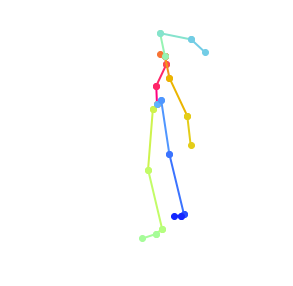

In [ ]:
viz.viz_seq(xyz_data1, '/content/drive/Shareddrives/vid tokenization/kit_viz/00001', 'kitml', debug=False)
viz.viz_seq(xyz_data2, '/content/drive/Shareddrives/vid tokenization/kit_viz/00002', 'kitml', debug=False)

##data.h5

In [ ]:

base_path = '/content/drive/Shareddrives/vid tokenization/asymov/packages/Complextext2animation/src/'
df=pd.read_hdf(base_path + 'dataProcessing/data.h5', 'df')
df

,euler,descriptions,quaternion,axis-angle,fke,rifke,perplexity,symbol
0,./kit-molan/dataset/00001_mmm.xml,A person is walking forwards.,./kit-molan/dataset/00001_quat.csv,./kit-molan/dataset/00001_ax.csv,./kit-molan/dataset/00001_fke.csv,./kit-molan/dataset/00001_rifke.csv,4.8936,/ps/project/conditional_action_gen/asymov/kit-...
1,./kit-molan/dataset/00002_mmm.xml,A person walks 4 steps forward.,./kit-molan/dataset/00002_quat.csv,./kit-molan/dataset/00002_ax.csv,./kit-molan/dataset/00002_fke.csv,./kit-molan/dataset/00002_rifke.csv,2.9028,/ps/project/conditional_action_gen/asymov/kit-...
2,./kit-molan/dataset/00003_mmm.xml,A human walking,./kit-molan/dataset/00003_quat.csv,./kit-molan/dataset/00003_ax.csv,./kit-molan/dataset/00003_fke.csv,./kit-molan/dataset/00003_rifke.csv,11.4383,/ps/project/conditional_action_gen/asymov/kit-...
3,./kit-molan/dataset/00004_mmm.xml,A person walks forward at medium speed.,./kit-molan/dataset/00004_quat.csv,./kit-molan/dataset/00004_ax.csv,./kit-molan/dataset/00004_fke.csv,./kit-molan/dataset/00004_rifke.csv,2.84528,/ps/project/conditional_action_gen/asymov/kit-...
4,./kit-molan/dataset/00004_mmm.xml,human slowly goes forward,./kit-molan/dataset/00004_quat.csv,./kit-molan/dataset/00004_ax.csv,./kit-molan/dataset/00004_fke.csv,./kit-molan/dataset/00004_rifke.csv,7.81427,/ps/project/conditional_action_gen/asymov/kit-...
...,...,...,...,...,...,...,...,...
7247,./kit-molan/dataset/03962_mmm.xml,A person runs straight forward.,./kit-molan/dataset/03962_quat.csv,./kit-molan/dataset/03962_ax.csv,./kit-molan/dataset/03962_fke.csv,./kit-molan/dataset/03962_rifke.csv,6.23501,/ps/project/conditional_action_gen/asymov/kit-...
7248,./kit-molan/dataset/03963_mmm.xml,,./kit-molan/dataset/03963_quat.csv,./kit-molan/dataset/03963_ax.csv,./kit-molan/dataset/03963_fke.csv,./kit-molan/dataset/03963_rifke.csv,,/ps/project/conditional_action_gen/asymov/kit-...
7249,./kit-molan/dataset/03964_mmm.xml,A person is sprinting up and down a small hill...,./kit-molan/dataset/03964_quat.csv,./kit-molan/dataset/03964_ax.csv,./kit-molan/dataset/03964_fke.csv,./kit-molan/dataset/03964_rifke.csv,10.7536,/ps/project/conditional_action_gen/asymov/kit-...
7250,./kit-molan/dataset/03965_mmm.xml,"A person runs forward, briefly touches the gro...",./kit-molan/dataset/03965_quat.csv,./kit-molan/dataset/03965_ax.csv,./kit-molan/dataset/03965_fke.csv,./kit-molan/dataset/03965_rifke.csv,13.0177,/ps/project/conditional_action_gen/asymov/kit-...


In [ ]:
df['euler']=df['euler'].apply(
    lambda x: x[7:]
) 
df['quaternion']=df['quaternion'].apply(
    lambda x: x[7:]
) 
df['axis-angle']=df['axis-angle'].apply(
    lambda x: x[7:]
) 
df['fke']=df['fke'].apply(
    lambda x: x[7:]
) 
df['rifke']=df['rifke'].apply(
    lambda x: x[7:]
)
df

,euler,descriptions,quaternion,axis-angle,fke,rifke,perplexity,symbol
0,./kit-molan/dataset/02968_mmm.xml,A person is walking forward very slowly while ...,./kit-molan/dataset/02968_quat.csv,./kit-molan/dataset/02968_ax.csv,./kit-molan/dataset/02968_fke.csv,./kit-molan/dataset/02968_rifke.csv,9.46775,/ps/project/conditional_action_gen/asymov/kit-...
1,./kit-molan/dataset/00550_mmm.xml,A person walks forward at medium speed.,./kit-molan/dataset/00550_quat.csv,./kit-molan/dataset/00550_ax.csv,./kit-molan/dataset/00550_fke.csv,./kit-molan/dataset/00550_rifke.csv,2.84528,/ps/project/conditional_action_gen/asymov/kit-...
2,./kit-molan/dataset/01899_mmm.xml,a person walks forwards,./kit-molan/dataset/01899_quat.csv,./kit-molan/dataset/01899_ax.csv,./kit-molan/dataset/01899_fke.csv,./kit-molan/dataset/01899_rifke.csv,3.55011,/ps/project/conditional_action_gen/asymov/kit-...
3,./kit-molan/dataset/03751_mmm.xml,,./kit-molan/dataset/03751_quat.csv,./kit-molan/dataset/03751_ax.csv,./kit-molan/dataset/03751_fke.csv,./kit-molan/dataset/03751_rifke.csv,,/ps/project/conditional_action_gen/asymov/kit-...
4,./kit-molan/dataset/02052_mmm.xml,A person raises his hands in a T pose and knee...,./kit-molan/dataset/02052_quat.csv,./kit-molan/dataset/02052_ax.csv,./kit-molan/dataset/02052_fke.csv,./kit-molan/dataset/02052_rifke.csv,8.47807,/ps/project/conditional_action_gen/asymov/kit-...
...,...,...,...,...,...,...,...,...
7247,./kit-molan/dataset/00168_mmm.xml,A human goes slowly 5 steps backward.,./kit-molan/dataset/00168_quat.csv,./kit-molan/dataset/00168_ax.csv,./kit-molan/dataset/00168_fke.csv,./kit-molan/dataset/00168_rifke.csv,8.32939,/ps/project/conditional_action_gen/asymov/kit-...
7248,./kit-molan/dataset/00168_mmm.xml,A person takes 5 steps backwards staring with ...,./kit-molan/dataset/00168_quat.csv,./kit-molan/dataset/00168_ax.csv,./kit-molan/dataset/00168_fke.csv,./kit-molan/dataset/00168_rifke.csv,7.18742,/ps/project/conditional_action_gen/asymov/kit-...
7249,./kit-molan/dataset/00168_mmm.xml,A person walks backwards.,./kit-molan/dataset/00168_quat.csv,./kit-molan/dataset/00168_ax.csv,./kit-molan/dataset/00168_fke.csv,./kit-molan/dataset/00168_rifke.csv,3.70885,/ps/project/conditional_action_gen/asymov/kit-...
7250,./kit-molan/dataset/00168_mmm.xml,A person walks five steps backwards.,./kit-molan/dataset/00168_quat.csv,./kit-molan/dataset/00168_ax.csv,./kit-molan/dataset/00168_fke.csv,./kit-molan/dataset/00168_rifke.csv,6.23208,/ps/project/conditional_action_gen/asymov/kit-...


In [ ]:
df.sort_values(by = 'euler').reset_index(drop=True)

,euler,descriptions,quaternion,axis-angle,fke,rifke,perplexity,symbol
0,./kit-molan/dataset/00001_mmm.xml,A person is walking forwards.,./kit-molan/dataset/00001_quat.csv,./kit-molan/dataset/00001_ax.csv,./kit-molan/dataset/00001_fke.csv,./kit-molan/dataset/00001_rifke.csv,4.8936,/ps/project/conditional_action_gen/asymov/kit-...
1,./kit-molan/dataset/00002_mmm.xml,A person walks 4 steps forward.,./kit-molan/dataset/00002_quat.csv,./kit-molan/dataset/00002_ax.csv,./kit-molan/dataset/00002_fke.csv,./kit-molan/dataset/00002_rifke.csv,2.9028,/ps/project/conditional_action_gen/asymov/kit-...
2,./kit-molan/dataset/00003_mmm.xml,A human walking,./kit-molan/dataset/00003_quat.csv,./kit-molan/dataset/00003_ax.csv,./kit-molan/dataset/00003_fke.csv,./kit-molan/dataset/00003_rifke.csv,11.4383,/ps/project/conditional_action_gen/asymov/kit-...
3,./kit-molan/dataset/00004_mmm.xml,A person walks forward at medium speed.,./kit-molan/dataset/00004_quat.csv,./kit-molan/dataset/00004_ax.csv,./kit-molan/dataset/00004_fke.csv,./kit-molan/dataset/00004_rifke.csv,2.84528,/ps/project/conditional_action_gen/asymov/kit-...
4,./kit-molan/dataset/00004_mmm.xml,human slowly goes forward,./kit-molan/dataset/00004_quat.csv,./kit-molan/dataset/00004_ax.csv,./kit-molan/dataset/00004_fke.csv,./kit-molan/dataset/00004_rifke.csv,7.81427,/ps/project/conditional_action_gen/asymov/kit-...
...,...,...,...,...,...,...,...,...
7247,./kit-molan/dataset/03962_mmm.xml,A person runs straight forward.,./kit-molan/dataset/03962_quat.csv,./kit-molan/dataset/03962_ax.csv,./kit-molan/dataset/03962_fke.csv,./kit-molan/dataset/03962_rifke.csv,6.23501,/ps/project/conditional_action_gen/asymov/kit-...
7248,./kit-molan/dataset/03963_mmm.xml,,./kit-molan/dataset/03963_quat.csv,./kit-molan/dataset/03963_ax.csv,./kit-molan/dataset/03963_fke.csv,./kit-molan/dataset/03963_rifke.csv,,/ps/project/conditional_action_gen/asymov/kit-...
7249,./kit-molan/dataset/03964_mmm.xml,A person is sprinting up and down a small hill...,./kit-molan/dataset/03964_quat.csv,./kit-molan/dataset/03964_ax.csv,./kit-molan/dataset/03964_fke.csv,./kit-molan/dataset/03964_rifke.csv,10.7536,/ps/project/conditional_action_gen/asymov/kit-...
7250,./kit-molan/dataset/03965_mmm.xml,"A person runs forward, briefly touches the gro...",./kit-molan/dataset/03965_quat.csv,./kit-molan/dataset/03965_ax.csv,./kit-molan/dataset/03965_fke.csv,./kit-molan/dataset/03965_rifke.csv,13.0177,/ps/project/conditional_action_gen/asymov/kit-...


In [ ]:
pd.DataFrame(df.sort_values(by = 'euler').reset_index(drop=True)).to_hdf(base_path + 'dataProcessing/data_new.h5', key='df', mode='w')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2718: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['euler', 'descriptions', 'quaternion', 'axis-angle', 'fke', 'rifke',
       'perplexity', 'symbol'],
      dtype='object')]

  encoding=encoding,
